# Reinforced Learning

It's not about machines learning something new, it's about getting better at what we taught to it in first place.

We need to create objective or fitness function to give to machine.

## **Random Selection**

BTK Video: 26.1

---

Give reward if we show an ad and user clicks it, if user not clicks ad we don't get any reward.

now we will try **RANDOM SELECTION**

(in here it'll be like worst algorithm)

---

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

data = pd.read_csv('Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


1208


<function matplotlib.pyplot.show(*args, **kw)>

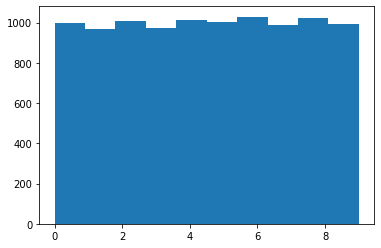

In [17]:
N = 10000
number_of_adds = 10
reward_sum = 0
chosen = []

for n in range(0,N):
  # select random ad
  ad = random.randrange(number_of_adds)
  chosen.append(ad)

  # if chosen ad value is 1 get reward
  reward = data.values[n, ad]
  reward_sum += reward

# since total ad count is around 12000 we expect to see a number around 1200
# because probability is 1/10
print(reward_sum)


# visualize
plt.hist(chosen)
plt.show

## **UPPER CONFIDENCE BOUND(UCB)**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

data = pd.read_csv('Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


Total sum: 2211


<function matplotlib.pyplot.show(*args, **kw)>

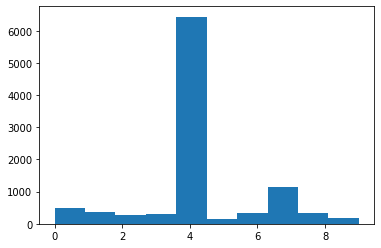

In [51]:
N = 10000
number_of_adds = 10
reward_sum = 0
chosen = []
number_of_clicks = [0] * number_of_adds

# create a reward list with d elements filled with zeroes
rewards = [0] * number_of_adds

for n in range(0,N):
  ad = 0  # chosen ad
  max_ucb = 0
  # find probability of chosen ad
  for i in range(0,number_of_adds):
    # for rescuing problems like dividing by 0 etc.
    if(number_of_clicks[i] > 0):
      average_reward = rewards[i] / number_of_clicks[i]
      delta = math.sqrt(3/2 * math.log(n)/number_of_clicks[i])
      ucb = average_reward + delta
    else:
      ucb = N * 10
    if max_ucb < ucb:
      max_ucb = ucb
      ad = i

  chosen.append(ad)
  number_of_clicks[ad] += 1
  reward = data.values[n, ad]
  rewards[ad] += reward
  reward_sum += reward

print("Total sum: " + str(reward_sum))




# visualize
plt.hist(chosen)
plt.show

# note it shows 4th add but dont forget it's start counting from 0!
# it is actually 5th ad

## **Thompson Sampling**